# Model Development



In [2]:
 pip install skillsnetwork


  Obtaining dependency information for ipywidgets<8,>=7 from https://files.pythonhosted.org/packages/14/3f/fa7fcf85061819f5a10ed09eaef38fe97d0f3f91d14674bbb26c3fc2a622/ipywidgets-7.8.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for comm>=0.1.3 from https://files.pythonhosted.org/packages/fe/47/0133ac1b7dc476ed77710715e98077119b3d9bae56b13f6f9055e7da1c53/comm-0.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=3.6.6 from https://files.pythonhosted.org/packages/9c/a0/ba2634cd75b7d7f8f9aeb38edf854cd6c9877ec064013a62630b4541b88f/widgetsnbextension-3.6.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets<3,>=1.0.0 from https://files.pythonhosted.org/packages/06/c9/50a16b6e7410d661ea16160f8c650c444ab83740b437b3c202ca7d8e2b73/jupyterlab_widgets-1.1.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/124.2 kB ? eta -:--:--
   ---------------------------------------  122.9/

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork

%matplotlib inline 

In [15]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [17]:
df = pd.read_csv(filename, header=0)

In [18]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()
lm

LinearRegression()

In [22]:
#Creating a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable

X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [23]:
#prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [24]:
#value of the intercept (a)
lm.intercept_

38423.305858157386

In [25]:
#value of the slope (b)
lm.coef_

array([-821.73337832])

### Linear model

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

In [27]:
#Training the model using "engine-size" as the independent variable and "price" as the dependent variable
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [28]:
#slope 
lm1.coef_

array([[166.86001569]])

In [29]:
#intercept
lm1.intercept_

array([-7963.33890628])

In [30]:
#equation of the predicted line
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

### Multiple Linear Regression

In [32]:
#predictor variables:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [33]:
#Fitting the linear model using the four variables
lm.fit(Z, df['price'])

LinearRegression()

In [34]:
# intercept(a)
lm.intercept_

-15806.624626329205

In [36]:
#coefficients (b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

linear function we get
 
<b>Price</b> = -15806.62462632918 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


In [38]:
#Creating and training a model "lm2" where the response variable is "price", and the predictor variable is
#"normalized-losses" and  "highway-mpg".

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [39]:
lm2.intercept_

38201.31327245727

In [40]:
lm2.coef_

array([   1.49789586, -820.45434016])

<b>Price</b> = 38201.31327245727 + 1.49789586 x <b>normalized-losses</b> -820.45434016 x <b>highway-mpg</b>

## Model Evaluation Using Visualization

In [41]:
import seaborn as sns
%matplotlib inline 

### Regression Plot

(0.0, 48178.700177651524)

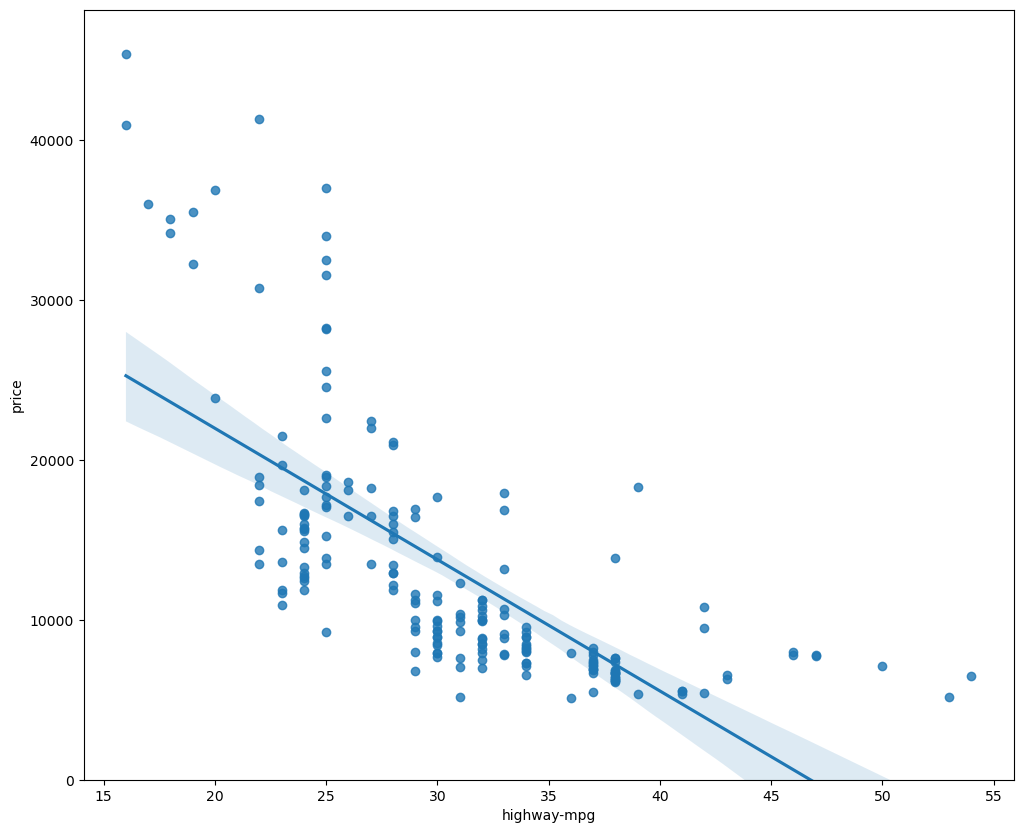

In [42]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

(0.0, 47414.1)

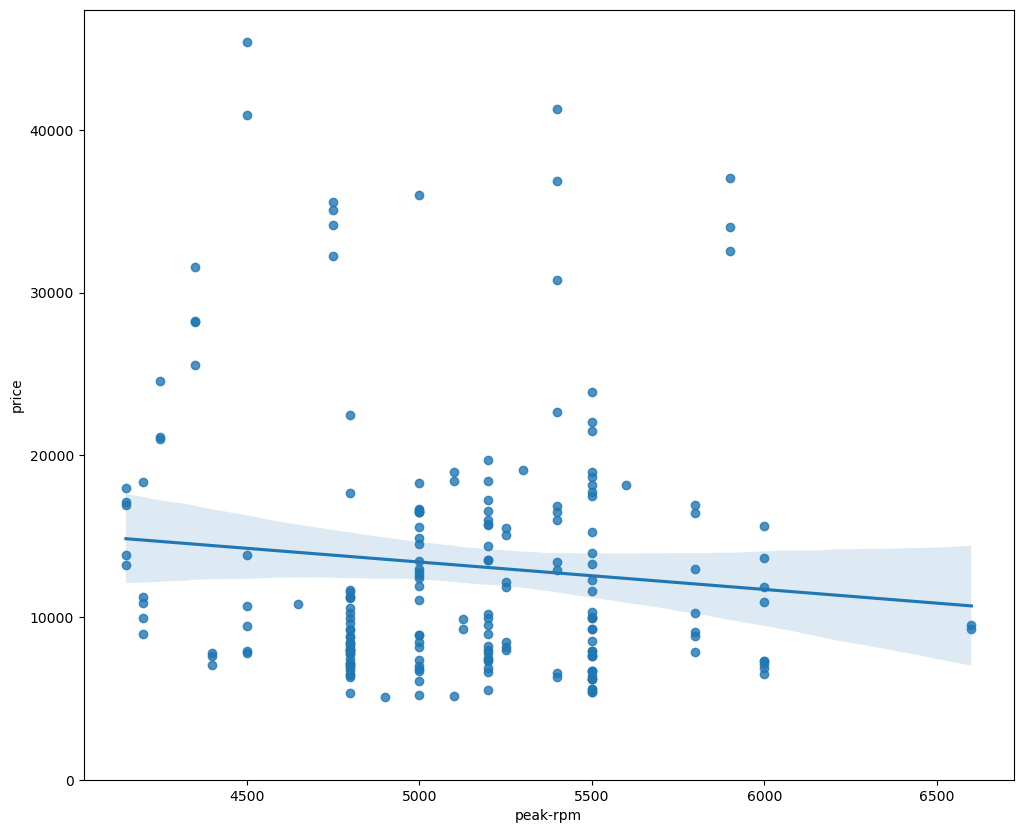

In [44]:
#comparing this plot to the regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [46]:
#checking if "peak-rpm" or "highway-mpg" more strongly correlated with "price"
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

### Residual Plot
Residual is the difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

Residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

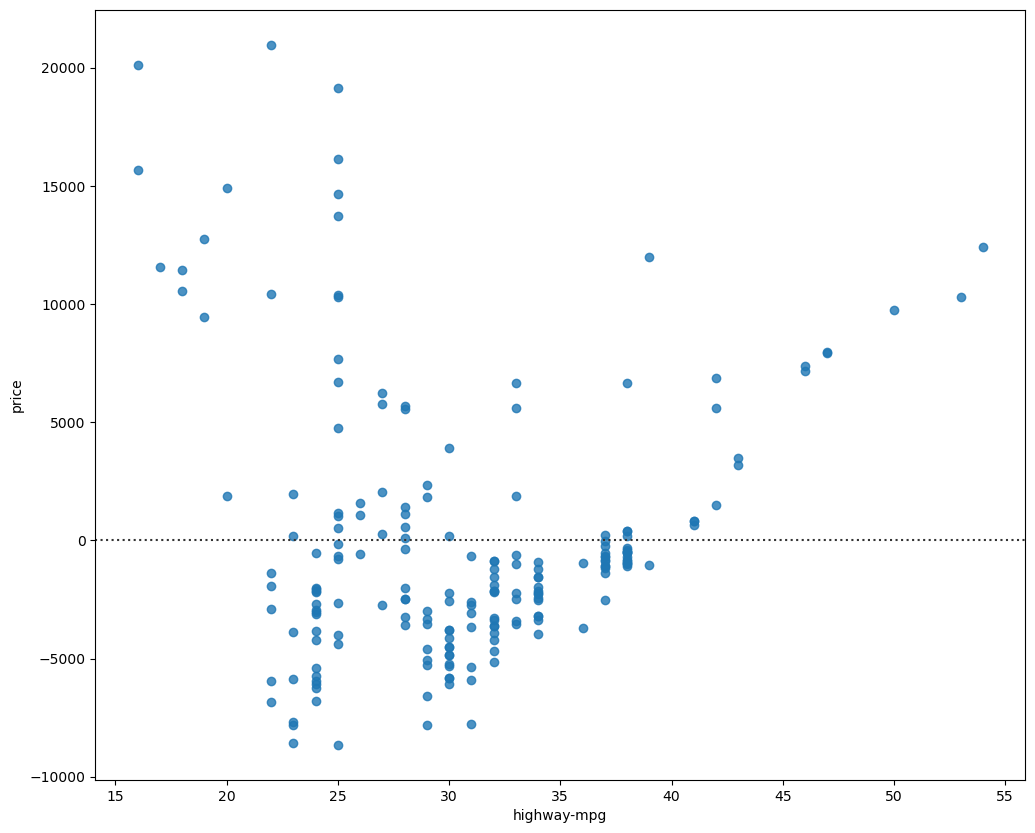

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


Residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

In [48]:
Y_hat = lm.predict(Z)

C:\Users\kasia\AppData\Local\Temp\ipykernel_20316\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\kasia\AppData\Local\Temp\ipykernel_20316\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

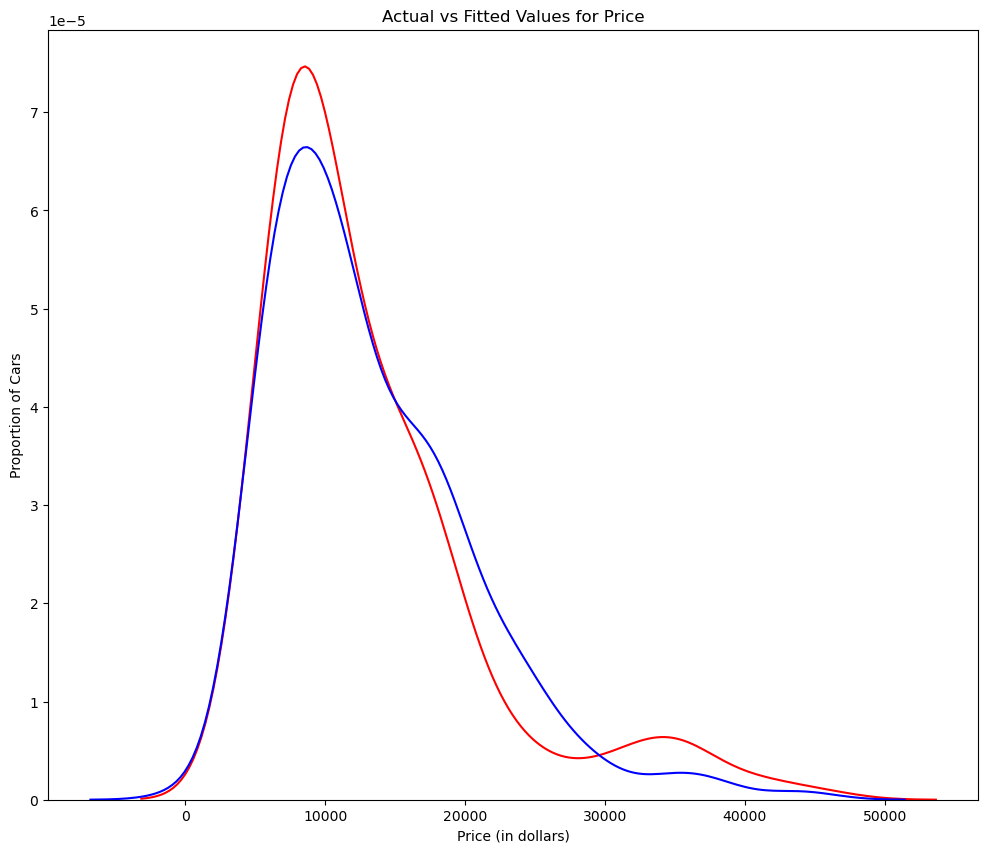

In [49]:
#Creating distribution plot

#checking distribution of the fitted values that result from the model and comparing it to the distribution of the actual values.

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

### Polynomial Regression and Pipelines

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [53]:
#checking fit using "highway-mpg" as the predictor variable.

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [54]:
#variables
x = df['highway-mpg']
y = df['price']

In [55]:
#polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


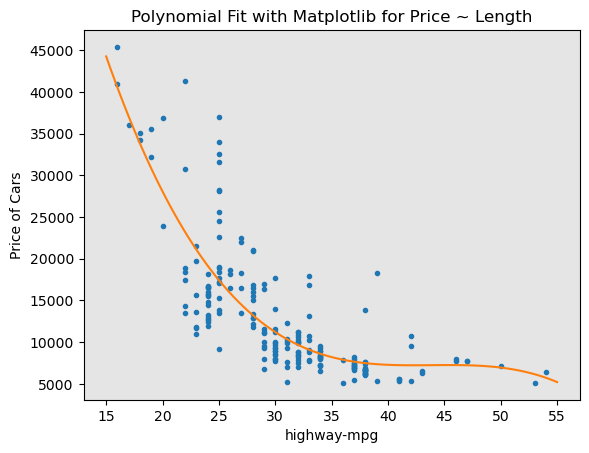

In [56]:
#using function
PlotPolly(p, x, y, 'highway-mpg')

In [57]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


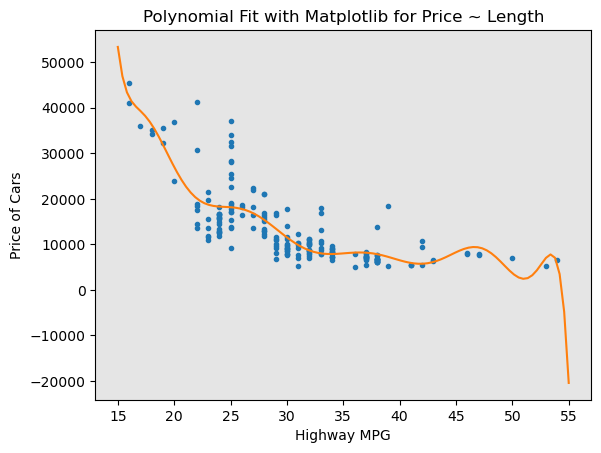

In [58]:
#Creating 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
#creating the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [70]:
#input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [71]:
#converting the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [72]:
#producing a preiction 
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Measures for In-Sample Evaluation

<p>Important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

### Model 1: Simple Linear Regression

In [74]:
#calculating R^2

#highway_mpg_fit
lm.fit(X, Y)

# R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~49.659% of the variation of the price is explained by this simple linear model, which we have built using the highway_mpg data.

In [75]:
#calculating MSE

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
#comparing the predicted results with the actual results

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression

In [78]:
#calculating R^2

lm.fit(Z, df['price'])
# R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577458


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [79]:
#calculating MSE

Y_predict_multifit = lm.predict(Z)

In [80]:
#comparing the predicted results with the actual results

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


### Model 3: Polynomial Fit

In [81]:
from sklearn.metrics import r2_score

In [82]:
#calculating R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906516


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [83]:
#calculating MSE

mean_squared_error(df['price'], p(x))

20474146.42636123

### Prediction and Decision Making

In [85]:
#creating new input 
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [86]:
lm.fit(X, Y)
lm

LinearRegression()

In [88]:
#producing a prediction 
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

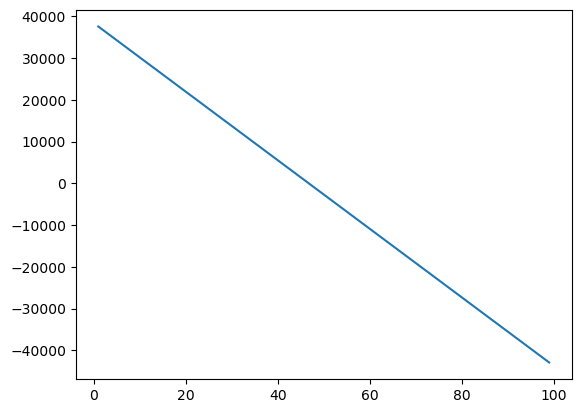

In [89]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

Model with the higher R-squared value and the smallest MSE value is a better fit for the data.


#### Simple Linear Model (SLR) vs. Polynomial Fit
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

#### Simple Linear Model (SLR) vs. Polynomial Fi

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>





Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset.

In [ ]:
head